In [111]:
# Dependencies
import numpy as np
import pandas as pd
from matplotlib import style

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [79]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [112]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [114]:
# Using the inspector to print the column names within the 'measurment' table 
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"])

id
station
date
prcp
tobs


##  Determine the Summary Statistics for June

In [80]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

In [81]:
# Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
June_results = session.query(Measurement).\
                 filter(extract('month', Measurement.date) == 6).all()

In [82]:
# Convert the June temperatures to a list.
June_temps= [temp.tobs for temp in June_results] 

In [83]:
# Create a DataFrame from the list of temperatures for the month of June. 
June_temp_df = pd.DataFrame(June_temps, columns = ['June Temps'])
June_temp_df.head(10)

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
5,78.0
6,77.0
7,78.0
8,78.0
9,79.0


In [84]:
# Calculate and print out the summary statistics for the June temperature DataFrame.
June_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## June Temperature Histogram

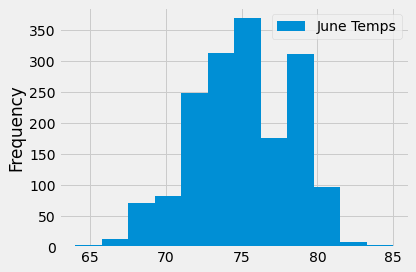

In [85]:
# Create the histogram for June temperature
import matplotlib.pyplot as plt
June_temp_df.plot.hist(bins=12)
plt.tight_layout()

## June pricipitation for Deliverable 3-Summary

In [86]:
# Perform a query to retrieve the date and precipitation scores of June
June_prcp = session.query(Measurement.date , Measurement.prcp).\
                 filter(extract('month', Measurement.date) == 6).all()

In [121]:
# Save the query results as a Pandas DataFrame and set the index to the date column
June_prcp_df = pd.DataFrame(June_prcp, columns = ['date','pricipitation'])
June_prcp_df.set_index(June_prcp_df ['date'], inplace=True)
June_prcp_df.head()

,date,pricipitation
date,,
2010-06-01,2010-06-01,0.00
2010-06-02,2010-06-02,0.01
2010-06-03,2010-06-03,0.00
2010-06-04,2010-06-04,0.00
2010-06-05,2010-06-05,0.00


In [127]:
# Sort the dataframe by date
June_prcp_df = June_prcp_df.sort_index()
June_prcp_df.head()

,date,pricipitation
date,,
2010-06-01,2010-06-01,0.00
2010-06-01,2010-06-01,0.01
2010-06-01,2010-06-01,0.00
2010-06-01,2010-06-01,NaN
2010-06-01,2010-06-01,0.03


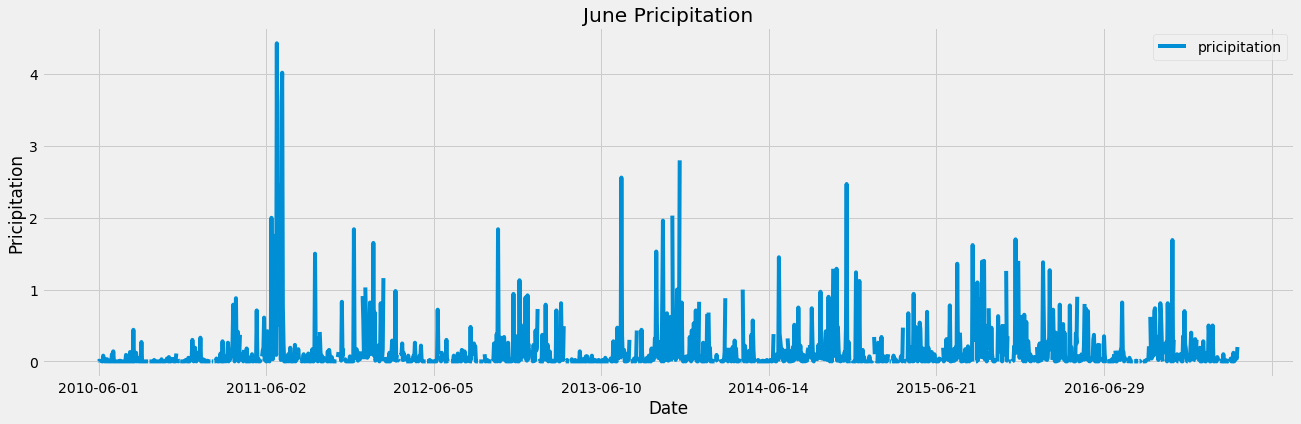

<Figure size 432x288 with 0 Axes>

In [128]:
# Plot the DataFrame, using the object-oriented interface method
ax = June_prcp_df.plot(figsize = (20,6))

# Add a title 
ax.set_title("June Pricipitation")

# Add a x- and y-axis label.
ax.set_xlabel("Date")
ax.set_ylabel("Pricipitation")

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save the figure named "June_prcp "
plt.savefig("June_prcp.png")
plt.show()
plt.tight_layout()

## Determine the Summary Statistics for December

In [92]:
# Write a query that filters the Measurement table to retrieve the temperatures for the month of December. 
Dec_results = session.query(Measurement).\
                 filter(extract('month', Measurement.date) ==12).all()

In [93]:
# Convert the December temperatures to a list.
Dec_temps= [temp.tobs for temp in Dec_results]

In [94]:
# Create a DataFrame from the list of temperatures for the month of December. 
Dec_temp_df = pd.DataFrame(Dec_temps, columns = ['December Temps'])
Dec_temp_df.head(10)

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
5,67.0
6,77.0
7,66.0
8,69.0
9,68.0


In [95]:
# Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_temp_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## December Temperature Histogram

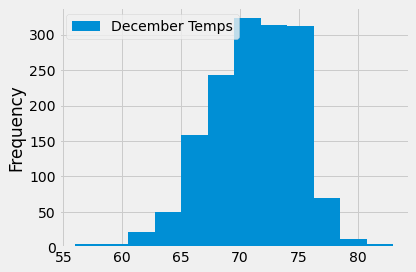

In [96]:
# Create the histogram for December temperature
import matplotlib.pyplot as plt
Dec_temp_df.plot.hist(bins=12)
plt.tight_layout()

## December pricipitation for Deliverable 3-Summary

In [97]:
# Perform a query to retrieve the date and pricipitation scores of December
Dec_prcp = session.query(Measurement.date , Measurement.prcp).\
                 filter(extract('month', Measurement.date) == 12).all()

In [123]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Dec_prcp_df = pd.DataFrame(Dec_prcp, columns = ['date','pricipitation'])
Dec_prcp_df.set_index(Dec_prcp_df ['date'], inplace=True)
Dec_prcp_df.head()

,date,pricipitation
date,,
2010-12-01,2010-12-01,0.04
2010-12-03,2010-12-03,0.00
2010-12-04,2010-12-04,0.00
2010-12-06,2010-12-06,0.00
2010-12-07,2010-12-07,0.00


In [129]:
# Sort the dataframe by date
Dec_prcp_df = Dec_prcp_df.sort_index()
Dec_prcp_df.head()

,date,pricipitation
date,,
2010-12-01,2010-12-01,0.04
2010-12-01,2010-12-01,0.03
2010-12-01,2010-12-01,0.70
2010-12-01,2010-12-01,0.03
2010-12-01,2010-12-01,1.35


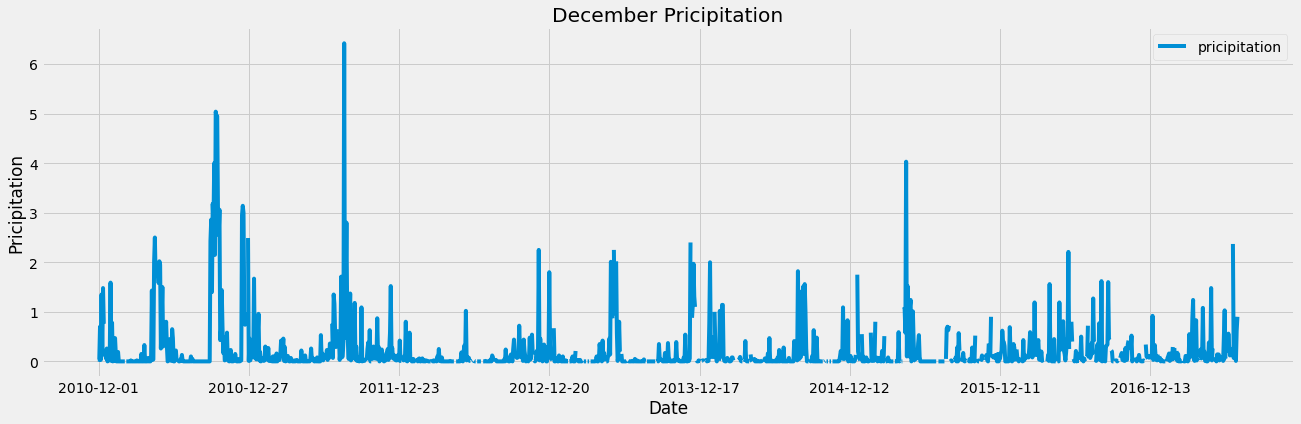

<Figure size 432x288 with 0 Axes>

In [130]:
# Plot the DataFrame, using the object-oriented interface method
ax = Dec_prcp_df.plot(figsize = (20,6))

# Add a title 
ax.set_title("December Pricipitation")

# Add a x- and y-axis label.
ax.set_xlabel("Date")
ax.set_ylabel("Pricipitation")

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save the figure named "June_prcp "
plt.savefig("Dec_prcp.png")
plt.show()
plt.tight_layout()